In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Necessary libraries and imports to complete this tutorial
from scipy.stats import f
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import random
from scipy.spatial import distance

# Chargement du dataset dans une DataFrame
dataset_R6 = pd.read_csv("./DatasetR6/S5_operators.csv", sep=';')

# Affichage des 5 premières lignes du dataset
print(dataset_R6.head())

  platform    dateid skillrank      role       operator primaryweapon  \
0       PC  20170210    Bronze  Attacker   BOPE-CAPITAO          M249   
1       PC  20170210    Bronze  Attacker   BOPE-CAPITAO          M249   
2       PC  20170210    Bronze  Attacker   BOPE-CAPITAO      PARA-308   
3       PC  20170210    Bronze  Attacker   BOPE-CAPITAO      PARA-308   
4       PC  20170210    Bronze  Attacker  G.E.O.-JACKAL           C7E   

  secondaryweapon secondarygadget  nbwins  nbkills  nbdeaths  nbpicks  
0           PRB92        CLAYMORE       6        6         6        8  
1           PRB92    STUN GRENADE       4        2         6        8  
2           PRB92        CLAYMORE      37       40        49       70  
3           PRB92    STUN GRENADE      17       24        31       41  
4          ITA12S   BREACH CHARGE      74      123       127      174  


In [38]:
from sklearn.cluster import AgglomerativeClustering

dataset_test = dataset_R6.copy()
dataset_test.drop(columns=['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget','platform','dateid','role'], inplace=True)

clusterings = []
for i in range(6) :
    clusterings.append(AgglomerativeClustering(n_clusters=i+1).fit(dataset_test[:20000]))
#dataset_test.shape

12973


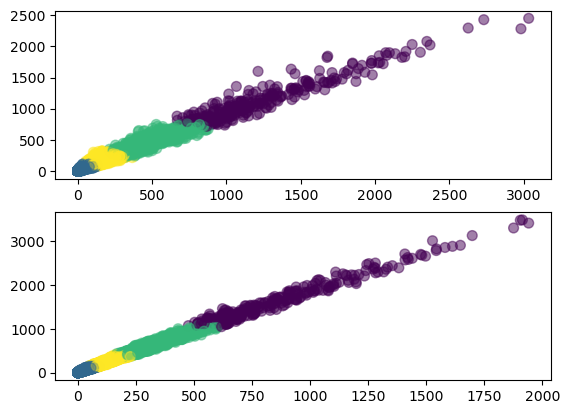

In [42]:
fig, axs = plt.subplots(2)
print(dataset_test['nbkills'].max())


axs[0].scatter(dataset_test['nbkills'][:20000], dataset_test['nbdeaths'][:20000],c=clusterings[3].labels_.astype(float), s=50, alpha=0.5)  

axs[1].scatter(dataset_test['nbwins'][:20000], dataset_test['nbpicks'][:20000],c=clusterings[3].labels_.astype(float), s=50, alpha=0.5)  
plt.show()

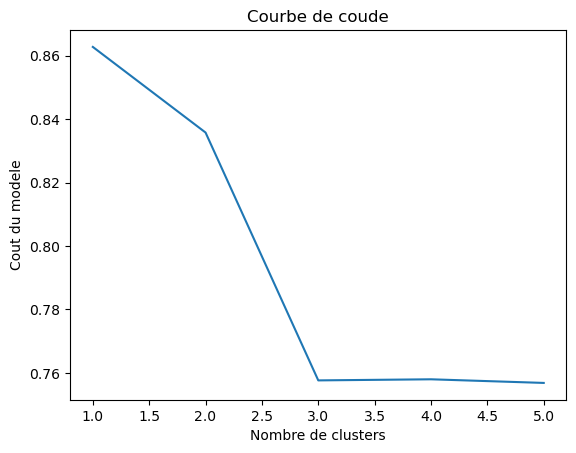

In [52]:
from sklearn.metrics import silhouette_score
silhouette = []

for i in range(1,6):
    silhouette.append(silhouette_score(dataset_test[:20000],clusterings[i].labels_))

plt.plot(range(1, 6), silhouette)
plt.title('Courbe de coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Cout du modele')
plt.show()

In [44]:
for i in clusterings :
    print(i.labels_)

[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 3 1]
[1 1 1 ... 1 3 1]
[0 0 0 ... 0 3 0]
